In [9]:
%matplotlib inline

In [3]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
con=sqlite3.connect("database.sqlite")

In [66]:
earnings = pd.read_sql_query("""
SELECT count_wne_p10, count_nwne_p10, mn_earn_wne_p10, md_earn_wne_p10, pct10_earn_wne_p10, pct25_earn_wne_p10, pct75_earn_wne_p10, pct90_earn_wne_p10
FROM Scorecard
WHERE count_wne_p10 IS NOT NULL""", con)

print(earnings.head())

  count_wne_p10 count_nwne_p10    mn_earn_wne_p10    md_earn_wne_p10  \
0          1139            116              37800              36600   
1          2636            366              47700              40800   
2            25              6  PrivacySuppressed  PrivacySuppressed   
3           975            122              53400              49300   
4          1577            210              33300              30500   

  pct10_earn_wne_p10 pct25_earn_wne_p10 pct75_earn_wne_p10 pct90_earn_wne_p10  
0               8100              21500              50400              66700  
1              10500              25200              59900              81900  
2  PrivacySuppressed  PrivacySuppressed  PrivacySuppressed  PrivacySuppressed  
3              13200              30800              71500              92100  
4               7500              17300              43200              59100  


In [67]:
for col in earnings.columns:
    earnings.loc[earnings[col] == 'PrivacySuppressed', col] = None

In [7]:
earnings.describe()

,OPEID,count_wne_p10,count_nwne_p10,mn_earn_wne_p10,md_earn_wne_p10,pct10_earn_wne_p10,pct25_earn_wne_p10,pct75_earn_wne_p10,pct90_earn_wne_p10
count,19311,18136,18137,16593,16593,14778,14778,14778,14778
unique,7479,2883,903,817,752,342,538,914,1158
top,224900,3365,8,42300,38400,6200,22500,56000,77000
freq,10,128,184,155,164,238,174,150,153


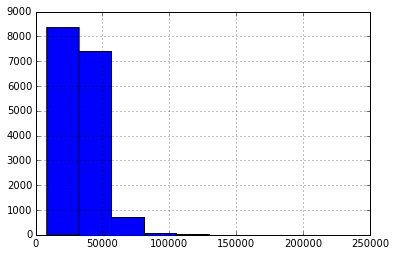

In [119]:
earnings.md_earn_wne_p10.hist()

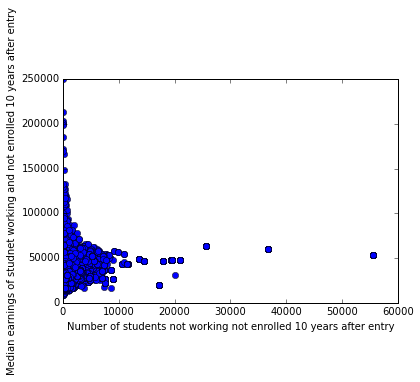

In [120]:
plt.plot(earnings.count_wne_p10, earnings.md_earn_wne_p10, 'o');
plt.xlabel("Number of students not working not enrolled 10 years after entry")
plt.ylabel("Median earnings of student working and not enrolled 10 years after entry")

In [107]:
school=pd.read_sql_query("""SELECT OPEID, ADM_RATE, SATVRMID, SATMTMID, SATWRMID FROM Scorecard""", con)

[0, 1, 300, 800]

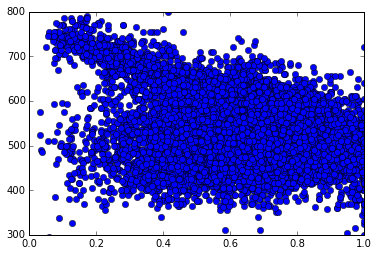

In [117]:
plt.plot(school.ADM_RATE, school.SATMTMID, 'o')
plt.axis([0, 1, 300, 800])

In [153]:
ccc=pd.read_sql_query("""SELECT md_faminc, md_earn_wne_p10, CUML_DEBT_P10, CUML_DEBT_P90, CUML_DEBT_P25, CUML_DEBT_P75, 
WDRAW_ORIG_YR2_RT FROM Scorecard""", con)

In [154]:
ccc.describe()

,md_faminc,md_earn_wne_p10,CUML_DEBT_P10,CUML_DEBT_P90,CUML_DEBT_P25,CUML_DEBT_P75,WDRAW_ORIG_YR2_RT
count,32337,19311,103759,103759,103759,103759,100244
unique,22347,753,5583,22358,10080,19850,34541
top,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
freq,766,2718,16090,16090,11922,11922,18432


In [155]:
for col in ccc.columns:
    ccc.loc[ccc[col] == 'PrivacySuppressed', col] = None

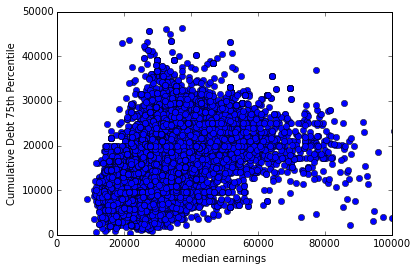

In [164]:
plt.plot(ccc.md_earn_wne_p10, ccc.CUML_DEBT_P75, 'o')
plt.axis([0, 100000, 0, 50000])
plt.xlabel("median earnings")
plt.ylabel("Cumulative Debt 75th Percentile")

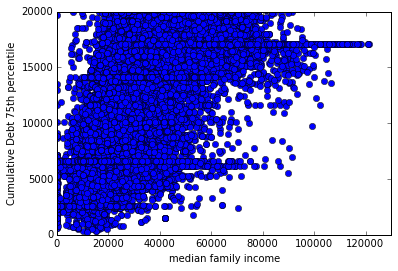

In [163]:
plt.plot(ccc.md_faminc, ccc.CUML_DEBT_P75, 'o')
plt.axis([0, 130000, 0, 20000])
plt.xlabel("median family income")
plt.ylabel("Cumulative Debt 75th percentile")

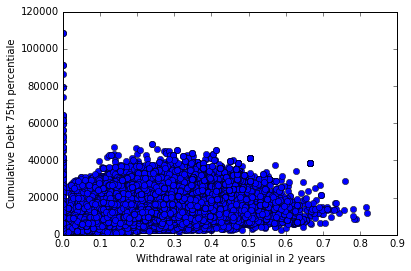

In [165]:
plt.plot(ccc.WDRAW_ORIG_YR2_RT, ccc.CUML_DEBT_P75, 'o')
plt.xlabel("Withdrawal rate at originial in 2 years")
plt.ylabel("Cumulative Debt 75th percentiale")

In [160]:
money=pd.read_sql_query("""SELECT COSTT4_A, COSTT4_P, TUITIONFEE_PROG, TUITFTE, 
INEXPFTE, AVGFACSAL, PFTFAC FROM Scorecard""", con)
money.describe()

,COSTT4_A,COSTT4_P,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC
count,20504.000000,12256.000000,30782.000000,106055.000000,1.060490e+05,69652.000000,60951.000000
mean,23002.166699,20068.453247,11574.881132,13423.722616,1.664149e+04,5137.648625,0.586056
std,11575.691881,8328.863797,6614.404962,138429.201381,9.460073e+05,2038.500431,0.299840
min,2200.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,13293.000000,14443.750000,7328.000000,2489.000000,2.456000e+03,3864.000000,0.326500
50%,21395.500000,18836.500000,10350.000000,5759.000000,4.160000e+03,4964.000000,0.565200
75%,29439.500000,24338.750000,14602.250000,10627.000000,6.739000e+03,6236.000000,0.882400
max,74473.000000,96720.000000,88550.000000,26670163.000000,2.920157e+08,24892.000000,1.166700


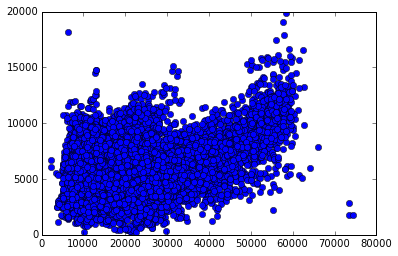

In [161]:
plt.plot(money.COSTT4_A, money.AVGFACSAL, 'o')
plt.xlabel("Cost of 4 year academic")
plt.ylabel("Average Salary of Faculty")

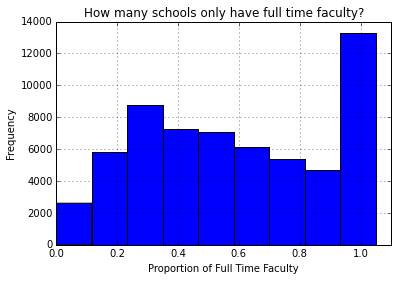

In [174]:
money.PFTFAC.hist()
plt.axis([0, 1.1 ,0,14000])
plt.title("How many schools only have full time faculty?")
plt.xlabel("Proportion of Full Time Faculty")
plt.ylabel("Frequency")